# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


2022-07-11 17:09:24.573983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-11 17:09:24.574016: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'True'

In [4]:
data_size = 'large'

In [5]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking/dataset/employee_challenge_train.csv')

In [6]:
target_col = 'ACTION'

#### Thresholds

In [7]:
threshold_NaN = 0.5

In [8]:
threshold_cat = 5

In [9]:
threshold_Z = 3.0

In [10]:
test_size = 0.33

In [11]:
threshold_entropy = 0.75

In [12]:
threshold_corr = 0.95

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

#### Drop user's columns:

In [16]:
user_drop_cols = []

Dataset before deletion

In [17]:
display(df)

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0           1     39353   85475         117961         118300         123472   
1           1     17183    1540         117961         118343         123125   
2           1     36724   14457         118219         118220         117884   
3           1     36135    5396         117961         118343         119993   
4           1     42680    5905         117929         117930         119569   
...       ...       ...     ...            ...            ...            ...   
32764       1     23497   16971         117961         118300         119993   
32765       1     25139  311198          91261         118026         122392   
32766       1     34924   28805         117961         118327         120299   
32767       1     80574   55643         118256         118257         117945   
32768       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          118536            118536       308574     118539  
2          117879            267952        19721     117880  
3          118321            240983       290919     118322  
4          119323            123932        19793     119325  
...           ...               ...          ...        ...  
32764      118321            240983       290919     118322  
32765      121143            173805       249618     121145  
32766      124922            152038       118612     124924  
32767      280788            280788       292795     119082  
32768      118568            122142        19721     118570  

[32769 rows x 10 columns]

In [18]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [19]:
display(df)

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0           1     39353   85475         117961         118300         123472   
1           1     17183    1540         117961         118343         123125   
2           1     36724   14457         118219         118220         117884   
3           1     36135    5396         117961         118343         119993   
4           1     42680    5905         117929         117930         119569   
...       ...       ...     ...            ...            ...            ...   
32764       1     23497   16971         117961         118300         119993   
32765       1     25139  311198          91261         118026         122392   
32766       1     34924   28805         117961         118327         120299   
32767       1     80574   55643         118256         118257         117945   
32768       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          118536            118536       308574     118539  
2          117879            267952        19721     117880  
3          118321            240983       290919     118322  
4          119323            123932        19793     119325  
...           ...               ...          ...        ...  
32764      118321            240983       290919     118322  
32765      121143            173805       249618     121145  
32766      124922            152038       118612     124924  
32767      280788            280788       292795     119082  
32768      118568            122142        19721     118570  

[32769 rows x 10 columns]

#### Dataset copy

In [20]:
df_copy = df.copy()

### Dataset Information

In [21]:
df.shape

(32769, 10)

#### Some records

In [22]:
display(df)

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0           1     39353   85475         117961         118300         123472   
1           1     17183    1540         117961         118343         123125   
2           1     36724   14457         118219         118220         117884   
3           1     36135    5396         117961         118343         119993   
4           1     42680    5905         117929         117930         119569   
...       ...       ...     ...            ...            ...            ...   
32764       1     23497   16971         117961         118300         119993   
32765       1     25139  311198          91261         118026         122392   
32766       1     34924   28805         117961         118327         120299   
32767       1     80574   55643         118256         118257         117945   
32768       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          118536            118536       308574     118539  
2          117879            267952        19721     117880  
3          118321            240983       290919     118322  
4          119323            123932        19793     119325  
...           ...               ...          ...        ...  
32764      118321            240983       290919     118322  
32765      121143            173805       249618     121145  
32766      124922            152038       118612     124924  
32767      280788            280788       292795     119082  
32768      118568            122142        19721     118570  

[32769 rows x 10 columns]

#### Dataframe structure

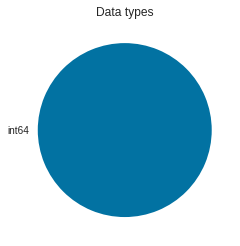

In [23]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [24]:
display(df.describe().T)

count           mean            std       min       25%  \
ACTION            32769.0       0.942110       0.233539       0.0       1.0   
RESOURCE          32769.0   42923.916171   34173.892702       0.0   20299.0   
MGR_ID            32769.0   25988.957979   35928.031650      25.0    4566.0   
ROLE_ROLLUP_1     32769.0  116952.627788   10875.563591    4292.0  117961.0   
ROLE_ROLLUP_2     32769.0  118301.823156    4551.588572   23779.0  118102.0   
ROLE_DEPTNAME     32769.0  118912.779914   18961.322917    4674.0  118395.0   
ROLE_TITLE        32769.0  125916.152644   31036.465825  117879.0  118274.0   
ROLE_FAMILY_DESC  32769.0  170178.369648   69509.462130    4673.0  117906.0   
ROLE_FAMILY       32769.0  183703.408893  100488.407413    3130.0  118363.0   
ROLE_CODE         32769.0  119789.430132    5784.275516  117880.0  118232.0   

                       50%       75%       max  
ACTION                 1.0       1.0       1.0  
RESOURCE           35376.0   74189.0  312153.0  
MGR_ID             13545.0   42034.0  311696.0  
ROLE_ROLLUP_1     117961.0  117961.0  311178.0  
ROLE_ROLLUP_2     118300.0  118386.0  286791.0  
ROLE_DEPTNAME     118921.0  120535.0  286792.0  
ROLE_TITLE        118568.0  120006.0  311867.0  
ROLE_FAMILY_DESC  128696.0  235280.0  311867.0  
ROLE_FAMILY       119006.0  290919.0  308574.0  
ROLE_CODE         118570.0  119348.0  270691.0

#### Which columns could be categorical ?

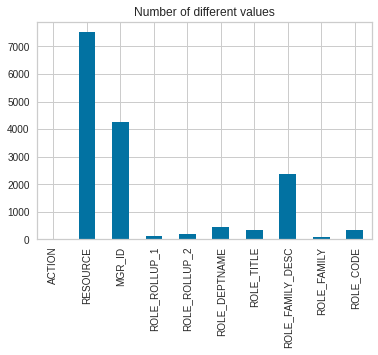

In [25]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [26]:
duplicates(df)

No duplicate rows.


ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0           1     39353   85475         117961         118300         123472   
1           1     17183    1540         117961         118343         123125   
2           1     36724   14457         118219         118220         117884   
3           1     36135    5396         117961         118343         119993   
4           1     42680    5905         117929         117930         119569   
...       ...       ...     ...            ...            ...            ...   
32764       1     23497   16971         117961         118300         119993   
32765       1     25139  311198          91261         118026         122392   
32766       1     34924   28805         117961         118327         120299   
32767       1     80574   55643         118256         118257         117945   
32768       1     14354   59575         117916         118150         117920   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0          117905            117906       290919     117908  
1          118536            118536       308574     118539  
2          117879            267952        19721     117880  
3          118321            240983       290919     118322  
4          119323            123932        19793     119325  
...           ...               ...          ...        ...  
32764      118321            240983       290919     118322  
32765      121143            173805       249618     121145  
32766      124922            152038       118612     124924  
32767      280788            280788       292795     119082  
32768      118568            122142        19721     118570  

[32769 rows x 10 columns]

#### Drop NaN:

In [27]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [28]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [29]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [30]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Column  ACTION  is categorical.
Encoding numeric column: RESOURCE
Encoding numeric column: MGR_ID
Encoding numeric column: ROLE_ROLLUP_1
Encoding numeric column: ROLE_ROLLUP_2
Encoding numeric column: ROLE_DEPTNAME
Encoding numeric column: ROLE_TITLE
Encoding numeric column: ROLE_FAMILY_DESC
Encoding numeric column: ROLE_FAMILY
Encoding numeric column: ROLE_CODE


#### Imputing NaN using IterativeImputer

In [31]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


##### Imputation

In [32]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [33]:
df = downcast_dtypes(df)

Memory usage of dataframe is 2.50MB
Memory usage after optimization is: 0.59MB
Decreased by 76.2%


##### Dataframe structure after compression

In [34]:
plot_dataframe_structure(df)

### Plottings

#### Ranking 

##### Ranking 1D 

In [35]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

In [36]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

In [37]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

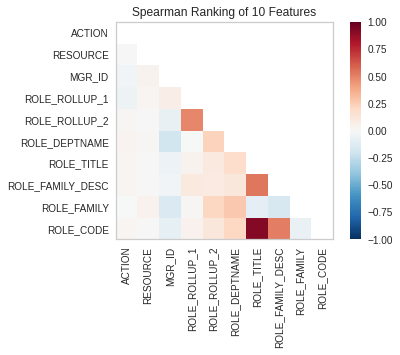

In [38]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

In [39]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [40]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [41]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [42]:
y = df[target_col]

In [43]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

In [44]:
feature_correlation(X, y);

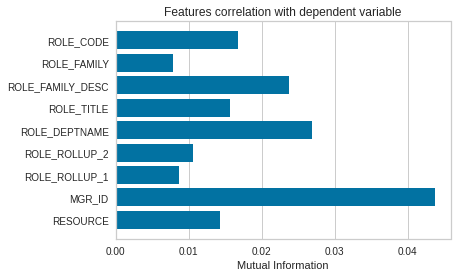

In [45]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

In [46]:
feature_importances(DecisionTreeClassifier(), X, y);

NameError: name 'DecisionTreeClassifier' is not defined

##### According to logistic regression

In [ ]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

In [47]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

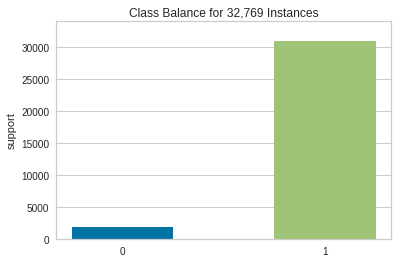

Entropy =  0.3190117478024129


In [48]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

#### Check columns that should be dropped

In [49]:
print(dropped_cols)

[]


## Splittings 

In [50]:
df = df_copy

#### Splitting dataframe in features and targets

In [51]:
y = df[target_col]

In [52]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [53]:
nb_features = len(X.columns.tolist())

In [54]:
nb_targets = len(y.unique())

In [55]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [56]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

Shannon Entropy = 0.319, split using RepeatedStratifiedKFold


##### Encoding

In [57]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [58]:
cat_selector = make_column_selector(dtype_include=object)

In [59]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [60]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [61]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [62]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [63]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [64]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [65]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Keras neural network definition

In [66]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(10 * layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(nb_targets, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


##### Early Stopping

In [67]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [68]:
K_C = KerasClassifier(K_Class, batch_size=64, epochs=2000, callbacks=[es], validation_split=0.1, verbose=1) 
K_C._estimator_type = 'classifier'

##### Level-0 models

In [69]:
level_0 = [ 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=50))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet'))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2'))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.15))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf'))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid'))), 
          ('KERC', make_pipeline(ntree_preprocessor, K_C)), 
          ]

##### Level-1 model

In [70]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Stacking for classification

In [71]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [72]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

2022-07-11 17:10:37.606744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-11 17:10:37.606773: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 17:10:37.606795: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-11 17:10:37.607037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2000
369/369 [==============================] - 3s 4ms/step - loss: 0.5466 - accuracy: 0.7945 - val_loss: 0.2721 - val_accuracy: 0.9420
Epoch 2/2000
369/369 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.9322 - val_loss: 0.2228 - val_accuracy: 0.9420
Epoch 3/2000
369/369 [==============================] - 1s 4ms/step - loss: 0.2480 - accuracy: 0.9381 - val_loss: 0.2206 - val_accuracy: 0.9420
Epoch 4/2000
369/369 [==============================] - 1s 4ms/step - loss: 0.2414 - accuracy: 0.9393 - val_loss: 0.2189 - val_accuracy: 0.9420
Epoch 5/2000
369/369 [==============================] - 1s 4ms/step - loss: 0.2356 - accuracy: 0.9409 - val_loss: 0.2185 - val_accuracy: 0.9420
Epoch 6/2000
369/369 [==============================] - 1s 3ms/step - loss: 0.2314 - accuracy: 0.9415 - val_loss: 0.2190 - val_accuracy: 0.9420
Epoch 7/2000
369/369 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.9418 - val_loss: 0.2184 - val_accuracy:

StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fb48f7ce770>),
                                                                                                  ('pipeline-2',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    S...
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fb48f7cf010>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('kerasclassifier',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb48f7cfd60>)]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'))

### Model evaluation

#### Model scoring

205/205 [==============================] - 0s 2ms/step


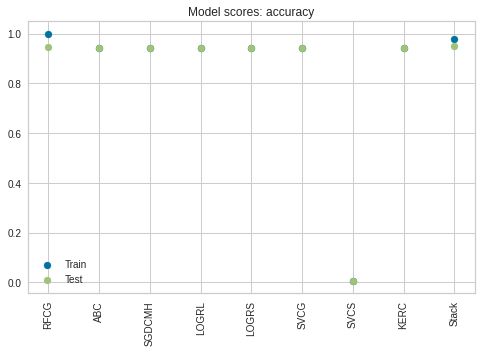

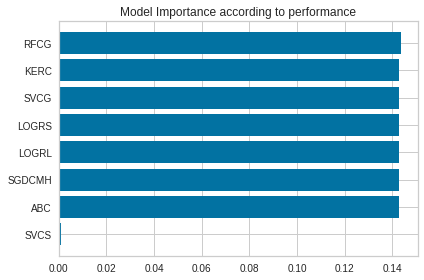

In [73]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

In [74]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

205/205 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://2565c489-83ea-4182-b209-243464e89c47/assets
INFO:tensorflow:Assets written to: ram://0bfa60cd-7fc9-42c3-9b99-4afd5d457582/assets


2022-07-11 17:28:17.401569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-11 17:28:17.401601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Assets written to: ram://394b1adc-5e58-47ec-bc32-df3074d32910/assets


2022-07-11 17:28:19.586491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-11 17:28:19.586554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-11 17:28:19.774685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-11 17:28:19.774730: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 17:28:19.774764: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-11 17:28:19.775142: I tensorflow/core/platform/cpu_fe

INFO:tensorflow:Assets written to: ram://a4f7f974-64ff-48ec-b8de-5c0489366552/assets


2022-07-11 17:28:22.717484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-11 17:28:22.717547: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 17:28:22.717582: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-11 17:28:22.718187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-11 17:28:22.780048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

INFO:tensorflow:Assets written to: ram://3b57c359-a8f0-4204-9ead-d2b30d07b9c1/assets


2022-07-11 17:28:26.385866: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-11 17:28:26.386077: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 17:28:26.386116: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-11 17:28:26.386482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-11 17:28:26.732962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

205/205 [==============================] - 1s 3ms/step


2022-07-11 17:28:29.878357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-11 17:28:29.878402: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-11 17:28:29.878434: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-11 17:28:29.879125: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


205/205 [==============================] - 1s 3ms/step
INFO:tensorflow:Assets written to: ram://904bd117-9b9a-4189-9c13-e567fbd59ff8/assets
205/205 [==============================] - 1s 3ms/step
INFO:tensorflow:Assets written to: ram://ffb5c49f-30dc-4108-b0fe-83626d81581e/assets
INFO:tensorflow:Assets written to: ram://d87d4f07-0591-455a-9c02-f70c532fba1c/assets
205/205 [==============================] - 1s 3ms/step
INFO:tensorflow:Assets written to: ram://8300fdf3-bd66-4695-b5dc-2c1f7f944b10/assets
205/205 [==============================] - 0s 1ms/step


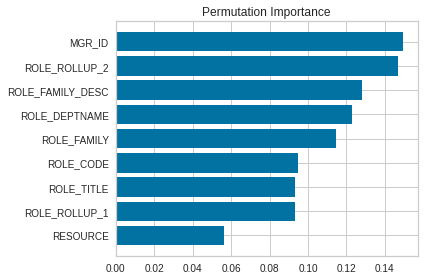

array([['RESOURCE', 0.05638413968715894],
       ['ROLE_ROLLUP_1', 0.09348854128774133],
       ['ROLE_TITLE', 0.09348854128774187],
       ['ROLE_CODE', 0.0949436158603131],
       ['ROLE_FAMILY', 0.1145871225900326],
       ['ROLE_DEPTNAME', 0.1229538013823203],
       ['ROLE_FAMILY_DESC', 0.12804656238632153],
       ['ROLE_ROLLUP_2', 0.14659876318661325],
       ['MGR_ID', 0.1495089123317573]], dtype=object)

In [75]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [76]:
features_of_interest = []

INFO:tensorflow:Assets written to: ram://bd77c9d4-8e93-42c3-8852-478fd6453a7a/assets
INFO:tensorflow:Assets written to: ram://edcd6c67-7140-471e-b30e-6bfb6ce5bfe3/assets
INFO:tensorflow:Assets written to: ram://5baf727f-7460-4202-9fb6-4f7236b4feb2/assets
INFO:tensorflow:Assets written to: ram://22268fae-0682-439a-9f19-875f78f901e3/assets
INFO:tensorflow:Assets written to: ram://837a1d09-7072-4a76-a385-7c206796472c/assets


KeyboardInterrupt: 

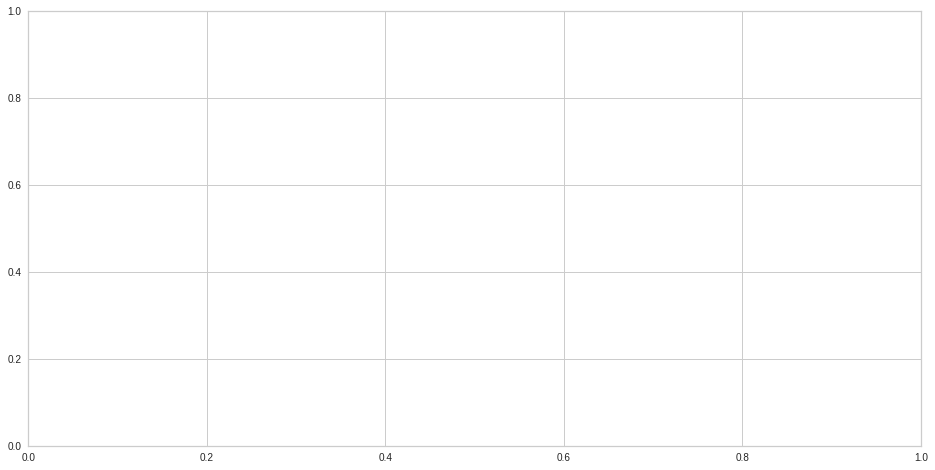

In [77]:
plot_partial_dependence(model, X_train, features_of_interest)

#### ROC/AUC

In [78]:
classes = y.unique()

205/205 [==============================] - 0s 2ms/step


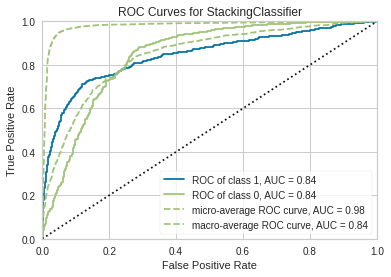

In [79]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

In [80]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

205/205 [==============================] - 0s 2ms/step


#### Confusion matrix

205/205 [==============================] - 0s 2ms/step


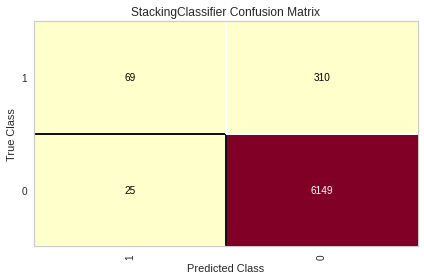

In [81]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

In [82]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

205/205 [==============================] - 0s 2ms/step


### Final Model

In [83]:
threshold_model = 5

In [84]:
threshold_score = 0.7

##### Filtered Level-0 models

In [85]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [86]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Build final model

In [87]:
model = StackingClassifier(level_0_f, final_estimator=level_1)

### Final Model fitting

In [88]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 3min 4s, sys: 5.52 s, total: 3min 10s
Wall time: 2min 6s


StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fb48f7ce770>),
                                                                                                  ('pipeline-2',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    S...
                                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fb48f7cf010>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('svc', SVC())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'))

#### Final Model scoring

In [89]:
score_stacking(model, X_train, y_train, X_test, y_test)

(array([['RFCG', 0.9998092767775404, 0.9467419502517931],
        ['SGDCMH', 0.9420964296612756, 0.9421638943995116],
        ['LOGRL', 0.9420964296612756, 0.9421638943995116],
        ['LOGRS', 0.9420964296612756, 0.9421638943995116],
        ['SVCG', 0.9422871528837351, 0.9421638943995116],
        ['Stack', 0.9905401281660055, 0.9494887837631619]], dtype=object),
 array([['SGDCMH', 0.19980582524271845],
        ['LOGRL', 0.19980582524271845],
        ['LOGRS', 0.19980582524271845],
        ['SVCG', 0.19980582524271845],
        ['RFCG', 0.20077669902912623]], dtype=object))

#### Final feature permutation importance

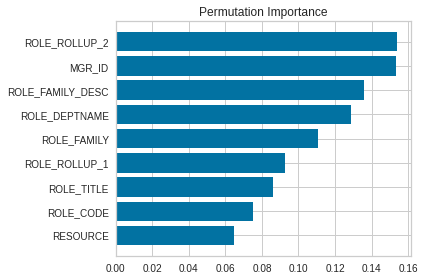

In [90]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [91]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [92]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [93]:
print(dropped_cols)

['RESOURCE', 'ROLE_CODE', 'ROLE_ROLLUP_1', 'ROLE_TITLE']


#### Final ROC/AUC

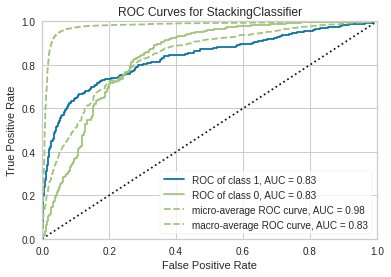

In [94]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Final Classification report

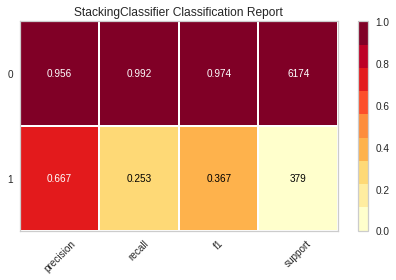

In [95]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Final Confusion matrix

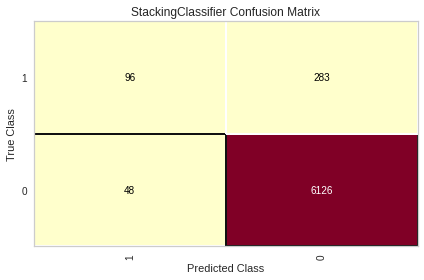

In [96]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Final Class prediction error

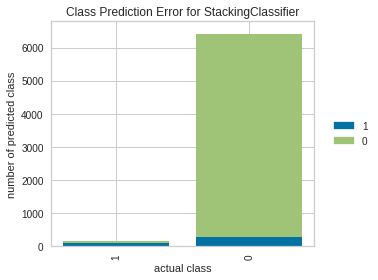

In [97]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Deployment

### Save your model

In [98]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [99]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)